In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [70]:
def normal_equation(x, y):
    """
    Function that finds the parameters that minimize the residual sum of squares by solving the normal equation.
    
    Parameters:
       x (array of shape (n, m)): array containing the m different predictors
       y (array of shape (n, 1)): array containing the response
       
    Output:
       params (array of shape (m+1,1)): parameters that minimize the residual sum of squares
    """
    params =  np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return params

In [80]:
def create_design_matrix(inputs, data):
    """
    Function that creates the design matrix, which contains the data on the independent variables. 
    
    Parameters:
       inputs (str): string that contains all the terms, separated by a +
       data (df): dataframe that contains the necessary data
       
    Output:
       X (df): dataframe of the independent variables
    """
    X = pd.DataFrame()  # Create empty dataframe
    n = len(data)     
    X['bias'] = np.ones(n)  # Add bias, x0=0, to X matrix
    predictors = inputs.split('+')  # Split string of inputs into different erms
    for predictor in predictors:
        predictor = predictor.strip()  # Remove whitespaces
        if 'np.power' in predictor:
            # Polynomial terms
            X[predictor] = np.power(df[predictor[-4]], int(predictor[-2]))
        else:
            X[predictor] = df[predictor]
    return X

X = create_design_matrix('x + np.power(x,2)', df)
params = normal_equation(X, y)
params

array([-2.73519947,  3.95631204, -0.03920048])

In [99]:
class LinearModel():
    def __init__(self, formula, data):
        self.formula = formula
        self.data = data
        
    def fit(self):
        predictors = self.formula.split('~')[1].strip()
        target = self.formula.split('~')[0].strip()
        X = self.create_design_matrix(predictors, self.data)
        self.params = self.normal_equation(X, df[target])
    
    
    def create_design_matrix(self, inputs, data):
        """
        Function that creates the design matrix, which contains the data on the independent variables. 
    
        Parameters:
           inputs (str): string that contains all the terms, separated by a +
           data (df): dataframe that contains the necessary data
       
        Output:
           X (df): dataframe of the independent variables
        """
        X = pd.DataFrame()  # Create empty dataframe
        n = len(data)     
        X['bias'] = np.ones(n)  # Add bias, x0=0, to X matrix
        predictors = inputs.split('+')  # Split string of inputs into different erms
        for predictor in predictors:
            predictor = predictor.strip()  # Remove whitespaces
            if 'np.power' in predictor:
                # Polynomial terms
                X[predictor] = np.power(df[predictor[-4]], int(predictor[-2]))
            else:
                X[predictor] = df[predictor]
        return X

    def normal_equation(self, x, y):
        """
        Function that finds the parameters that minimize the residual sum of squares by solving the normal equation.
    
        Parameters:
           x (array of shape (n, m)): array containing the m different predictors
           y (array of shape (n, 1)): array containing the response
       
        Output:
           params (array of shape (m+1,1)): parameters that minimize the residual sum of squares
        """
        params =  np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        return params

model = LinearModel('y ~ x + np.power(x,2)', df)
model.fit()
model.params

array([-2.73519947,  3.95631204, -0.03920048])

In [95]:
formula ='y ~ x + np.power(x, 2)'
formula.split('~')[1].strip()

'x + np.power(x, 2)'

In [75]:
# Create dataset, y = 2 + 3x + error

x = np.linspace(0, 10, 20)
y = 2 + 3*x + np.random.normal(scale = 5, size = 20)

df = pd.DataFrame({'x': x, 'y':y})
df.head()

,x,y
0,0.000000,-4.890171
1,0.526316,2.542395
2,1.052632,-6.772185
3,1.578947,13.473529
4,2.105263,5.188319


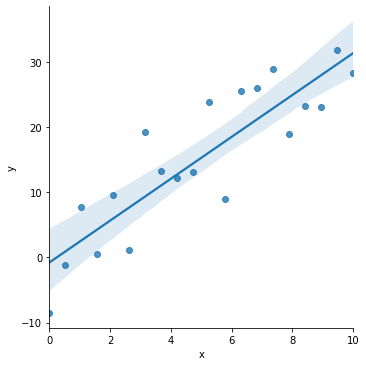

In [33]:
sns.lmplot(x = 'x', y = 'y', data = df)
plt.show()

In [34]:
p = normal_equation(df['x'], df['y'])
p
df['x'].shape

(20,)

In [100]:
# Create model using statsmodels

model = sm.OLS.from_formula('y ~ x + np.power(x, 2)', data= df).fit()
model.params

Intercept        -2.735199
x                 3.956312
np.power(x, 2)   -0.039200
dtype: float64

In [72]:
# Create model using sklearn
model_sk = LinearRegression()
model_sk.fit(df[['x']], df['y'])
print(model_sk.intercept_)
print(model_sk.coef_)

3.58718118200796
[2.74941184]


In [73]:
preds = model_sk.predict(df[['x']])

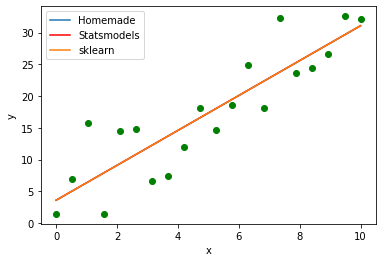

In [74]:
plt.scatter(x, y, color = 'green')
plt.plot(x, p[0] + p[1]*x, label = 'Homemade')
plt.plot(x, model.params[0] + model.params[1]*x, label = 'Statsmodels', color = 'red')
plt.plot(x, preds, label = 'sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()